In [2]:
import pandas as pd
import numpy as np

In [3]:
df_list = []
for df_ in pd.read_csv('test_data/test_data_1.csv', sep = ';', iterator = True, encoding = 'koi8_r', parse_dates = ['1'], chunksize = 10000):
    df_list.append(df_)
df = pd.concat(df_list, ignore_index = True)

In [4]:
print(df.shape)

(24991557, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24991557 entries, 0 to 24991556
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   1       datetime64[ns]
 1   2       object        
 2   3       object        
 3   4       int64         
 4   5       int64         
 5   6       int64         
 6   7       int64         
 7   8       float64       
 8   9       float64       
 9   11      object        
 10  12      float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 2.0+ GB


In [6]:
df.head(10)

,1,2,3,4,5,6,7,8,9,11,12
0,2020-10-09 02:44:34,5f7fce92d99ca969586aa55b,03.11,1,0,1,0,61.0,1.0,46caf1e426f985b521b7db8ca06e673e,NaN
1,2020-10-09 03:39:04,5f7fdb58d99ca969586adda9,47.65,0,0,0,0,19.0,0.0,8c7a5cb2c37c22732021c2aa2c801852,NaN
2,2020-10-09 04:49:32,5f7febdcd99ca969586b2606,38.1,0,1,0,0,83.0,1.0,46caf1e426f985b521b7db8ca06e673e,NaN
3,2020-10-09 04:52:48,5f7feca0d99ca969586b29c8,52.21.1,0,0,0,0,12.0,1.0,1db93008ae039827103418d3fb65c87a,NaN
4,2020-10-09 04:52:48,5f7feca0d99ca969586b29c8,52.21.1,0,0,0,0,49.0,0.0,109b56af4b08fdcc524eba4753c9e2b7,NaN
5,2020-10-09 04:52:48,5fa0eafdd99ca969581c523b,46.90,0,0,0,0,22.0,1.0,320576b03805cc6699154ec6846fa345,NaN
6,2020-10-09 04:52:48,5fa0eafdd99ca969581c523b,46.90,0,0,1,0,89.0,0.0,8c7a5cb2c37c22732021c2aa2c801852,NaN
7,2020-10-09 05:31:12,5f7ff5a0d99ca969586b59ca,63.11.1,0,0,0,0,31.0,1.0,320576b03805cc6699154ec6846fa345,NaN
8,2020-10-09 05:31:12,5f897e2ed99ca969584e2b58,63.11.1,0,0,0,0,4.0,0.0,7a64d6d95a1a230a3e1379f734bf1e5d,NaN
9,2020-10-09 05:39:51,5fbf98afd99ca969582c1849,71.12.3,1,1,0,0,50.0,1.0,1db93008ae039827103418d3fb65c87a,NaN


# Предобработка

In [8]:
cols = df.columns.values
print(cols)

['1' '2' '3' '4' '5' '6' '7' '8' '9' '11' '12']


# посмотрим сколько уникальных значений и пропущенных значений по каждому столбцу

In [32]:
def info_my(cols):
    for col in cols:
        print('feature:', col)
        print('Number of unique records:', len(df[col].unique()))
        print('Number of NaN: ', df[col].isna().sum())
        print()
#info_my(cols)

Вывод:
feature 3, feature 8 - числовые признаки
feature 4, feature 5, feature 6, feature 7, feature 9, feature 11 - категориальные признаки
feature 12 - пустой столбец

In [14]:
df.drop('12', axis = 1, inplace = True) # удалим 12 признак

In [15]:
df.head()

,1,2,3,4,5,6,7,8,9,11
0,2020-10-09 02:44:34,5f7fce92d99ca969586aa55b,03.11,1,0,1,0,61.0,1.0,46caf1e426f985b521b7db8ca06e673e
1,2020-10-09 03:39:04,5f7fdb58d99ca969586adda9,47.65,0,0,0,0,19.0,0.0,8c7a5cb2c37c22732021c2aa2c801852
2,2020-10-09 04:49:32,5f7febdcd99ca969586b2606,38.1,0,1,0,0,83.0,1.0,46caf1e426f985b521b7db8ca06e673e
3,2020-10-09 04:52:48,5f7feca0d99ca969586b29c8,52.21.1,0,0,0,0,12.0,1.0,1db93008ae039827103418d3fb65c87a
4,2020-10-09 04:52:48,5f7feca0d99ca969586b29c8,52.21.1,0,0,0,0,49.0,0.0,109b56af4b08fdcc524eba4753c9e2b7


In [16]:
df['3'] = pd.to_numeric(df['3'], errors = 'coerce') # преобразуем 3 признак в числовой

In [17]:
df['3'].value_counts()

64.11    4819812
64.19    2269702
85.14    1552899
72.19     735188
58.19     695275
          ...   
27.31          1
32.10          1
11.02          1
3.20           1
74.14          1
Name: 3, Length: 687, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24991557 entries, 0 to 24991556
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   1       datetime64[ns]
 1   2       object        
 2   3       float64       
 3   4       int64         
 4   5       int64         
 5   6       int64         
 6   7       int64         
 7   8       float64       
 8   9       float64       
 9   11      object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 1.9+ GB


In [26]:
print('Пропущенных значений:', df['3'].isna().sum())
df['3'].dropna(inplace = True) # удалим пропущенные значения !!! не всегда - смотря какая задача - Здесь нужно упростить

Пропущенных значений: 4887004


In [29]:
df.dropna(inplace = True) # ~10 млн записей удалили

In [30]:
df.shape # ~ 10 млн записей удалили

(19492754, 10)

In [33]:
info_my(cols)

feature: 1
Number of unique records: 313287
Number of NaN:  0

feature: 2
Number of unique records: 97126
Number of NaN:  0

feature: 3
Number of unique records: 685
Number of NaN:  0

feature: 4
Number of unique records: 2
Number of NaN:  0

feature: 5
Number of unique records: 2
Number of NaN:  0

feature: 6
Number of unique records: 2
Number of NaN:  0

feature: 7
Number of unique records: 2
Number of NaN:  0

feature: 8
Number of unique records: 111
Number of NaN:  0

feature: 9
Number of unique records: 2
Number of NaN:  0

feature: 11
Number of unique records: 12
Number of NaN:  0

feature: 12


KeyError: '12'

# Удаление выбросов

<AxesSubplot:>

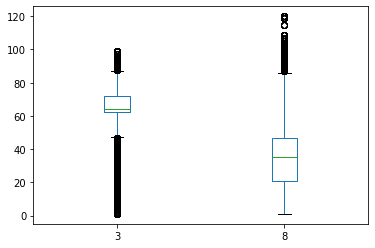

In [29]:
df[['3', '8']].plot(kind = 'box') # boxlot по 3 и 8 признаку

In [42]:
df[['3', '8']].describe()

,3,8
count,1.949275e+07,1.949275e+07
mean,6.583163e+01,3.470744e+01
std,1.469058e+01,1.942200e+01
min,1.100000e+00,1.000000e+00
25%,6.209000e+01,2.100000e+01
50%,6.419000e+01,3.500000e+01
75%,7.219000e+01,4.700000e+01
max,9.900000e+01,1.200000e+02


In [50]:
def my_ouliers(df, col):
    Q1 =  df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    mask = np.logical_and((df[col] > Q1-1.5*IQR ), (df[col] < Q3+1.5*IQR))
    return(df[mask])

In [53]:
df1 = my_ouliers(df, '8')

In [55]:
df2 = my_ouliers(df1, '3')

<AxesSubplot:>

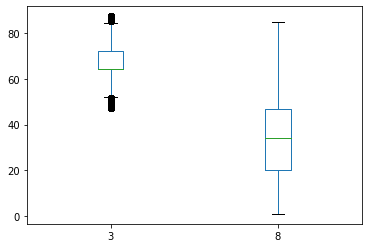

In [56]:
df2[['3', '8']].plot(kind = 'box') # boxlot по 3 и 8 признаку

# Обработка качественных признаков

In [5]:
df = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '11']]

In [7]:
df['4'].value_counts()

0    14561423
1     1760013
Name: 4, dtype: int64

In [8]:
df['5'].value_counts()

0    13133187
1     3188249
Name: 5, dtype: int64

In [9]:
df['6'].value_counts()

0    15382789
1      938647
Name: 6, dtype: int64

In [10]:
df['7'].value_counts()

0    16229736
1       91700
Name: 7, dtype: int64

# Строим таблицы сопряженности между 4 и 5 признаком

In [12]:
pd.crosstab(index = df['4'], columns = df['5'])

5,0,1
4,,
0,12026558,2534865
1,1106629,653384


# связь между категориальными признаками можно определить через  Тест Хи-Квадрат

In [13]:
import scipy.stats as sst
sst.chi2_contingency(pd.crosstab(index = df['4'], columns = df['5']), correction = True)

(388311.3309775153,
 0.0,
 1,
 array([[11716977.06287002,  2844445.93712998],
        [ 1416209.93712998,   343803.06287002]]))

In [14]:
sst.chi2_contingency(pd.crosstab(index = df['5'], columns = df['6']), correction = True)

(131598.2284909623,
 0.0,
 1,
 array([[12377896.43745458,   755290.56254542],
        [ 3004892.56254542,   183356.43745458]]))

In [15]:
sst.chi2_contingency(pd.crosstab(index = df['4'], columns = df['7']), correction = True)

(23428.016862994256,
 0.0,
 1,
 array([[1.44796114e+07, 8.18115814e+04],
        [1.75012458e+06, 9.88841865e+03]]))

In [16]:
sst.chi2_contingency(pd.crosstab(index = df['5'], columns = df['7']), correction = True)

(257956.46114079116,
 0.0,
 1,
 array([[13059399.78863575,    73787.21136425],
        [ 3170336.21136425,    17912.78863575]]))

# В Тесте Хи-Квадрат нет смысла (p-value не считается из-за большого количества записей)

# Анализ числовых признаков

In [17]:
sst.pearsonr(df['3'], df['8'])

(0.09967954838721219, 0.0)

In [18]:
sst.spearmanr(df['3'], df['8'])

SpearmanrResult(correlation=0.07378163635149759, pvalue=0.0)

<AxesSubplot:xlabel='3', ylabel='8'>

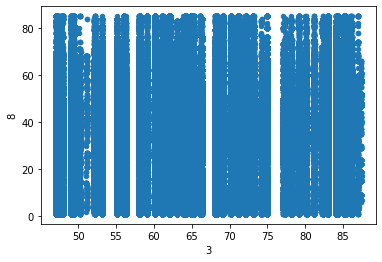

In [20]:
df.plot(x = '3', y = '8', kind = 'scatter')

# Линейная взаимосвязь между числовыми признаками отсутствует

# Исследование взаимосвзяи между числовыми и катеогриальными признаками

In [22]:
df.groupby('4').agg({'8': 'mean', '3': 'mean'})

,8,3
4,,
0,34.067853,67.714210
1,35.675768,67.007285


In [23]:
df.groupby('5').agg({'8': 'mean', '3': 'mean'})

,8,3
5,,
0,34.812812,67.505833
1,31.886800,68.182320


In [24]:
df.groupby('6').agg({'8': 'mean', '3': 'mean'})

,8,3
6,,
0,33.044337,67.171585
1,53.856418,75.281370


In [25]:
df.groupby('7').agg({'8': 'mean', '3': 'mean'})

,8,3
7,,
0,34.251890,67.630705
1,32.356576,68.925400


In [26]:
df.groupby('9').agg({'8': 'mean', '3': 'mean'})

,8,3
9,,
0.0,35.209453,68.182956
1.0,32.930267,66.900072


In [27]:
df.groupby('11').agg({'8': 'mean', '3': 'mean'})

,8,3
11,,
064d8845a16a86ea474fb51d8d75485c,33.779663,67.320691
109b56af4b08fdcc524eba4753c9e2b7,34.357284,68.437585
1b2bb26255a8f339e6ec452dd6adb1cf,34.436920,66.887142
1db93008ae039827103418d3fb65c87a,33.670223,67.974060
320576b03805cc6699154ec6846fa345,35.043524,67.787508
46caf1e426f985b521b7db8ca06e673e,35.888842,67.178799
48f808fe89e2e3fa4a9f9fd84a3b8acb,33.976672,67.904480
58d038413c287291f5ec767c2955f0a8,34.400286,69.714271
5dc969b81af2cd1bbbdb0989e44f5552,39.586349,66.687565


# По фактору 6 есть значимая разница в средних по признаку 8, по стальным нет

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='6', ylabel='8'>

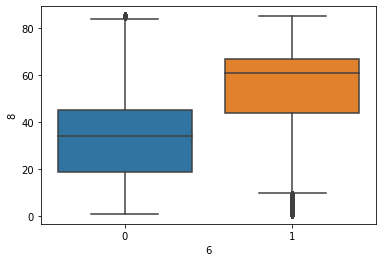

In [29]:
sns.boxplot(data = df, x = '6', y = '8')

<AxesSubplot:xlabel='11', ylabel='8'>

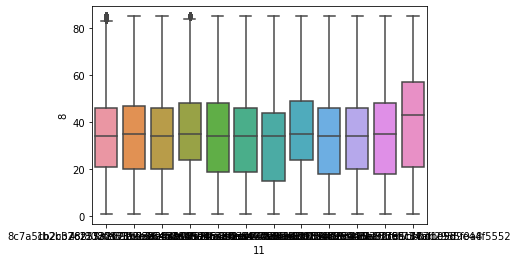

In [31]:
sns.boxplot(data = df, x = '11', y = '8')

In [33]:
! pip install statsmodels

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Многофакторный дисперсионный анализ

In [46]:
cols1 = ['feature%i' % i for i in range(1, 11)]

In [45]:
print(df.columns)
print(cols1)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '11'], dtype='object')
['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11']


In [47]:
df.columns = cols1
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,2020-10-09 03:39:04,5f7fdb58d99ca969586adda9,47.65,0,0,0,0,19.0,0.0,8c7a5cb2c37c22732021c2aa2c801852
1,2020-10-09 06:01:02,5f7ffc9ed99ca969586b858f,63.91,0,0,0,0,52.0,0.0,1b2bb26255a8f339e6ec452dd6adb1cf
2,2020-10-09 06:11:37,5f7fff19d99ca969586b9ac9,64.99,1,0,0,0,32.0,0.0,48f808fe89e2e3fa4a9f9fd84a3b8acb
3,2020-10-09 06:18:57,5f8000d1d99ca969586bab39,85.21,0,0,0,0,3.0,1.0,320576b03805cc6699154ec6846fa345
4,2020-10-09 06:18:57,5f8000d1d99ca969586bab39,85.21,0,0,0,0,7.0,0.0,320576b03805cc6699154ec6846fa345


In [50]:
model = ols("feature8 ~ feature4 + feature5", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
feature4,7.677897e+06,1.0,21353.532650,0.0
feature5,2.558249e+07,1.0,71149.239523,0.0
Residual,5.868550e+09,16321433.0,NaN,NaN


# Anova тоже не имеет смысла из-за большого количества записей

# Перобразование кодов в классы

In [55]:
my_dict = dict(zip(df.feature10.unique(), list(range(12))))

In [56]:
my_dict

{'8c7a5cb2c37c22732021c2aa2c801852': 0,
 '1b2bb26255a8f339e6ec452dd6adb1cf': 1,
 '48f808fe89e2e3fa4a9f9fd84a3b8acb': 2,
 '320576b03805cc6699154ec6846fa345': 3,
 '109b56af4b08fdcc524eba4753c9e2b7': 4,
 '064d8845a16a86ea474fb51d8d75485c': 5,
 'e2729bc302c9747abe48f081c7e944cb': 6,
 '46caf1e426f985b521b7db8ca06e673e': 7,
 '1db93008ae039827103418d3fb65c87a': 8,
 '7a64d6d95a1a230a3e1379f734bf1e5d': 9,
 '58d038413c287291f5ec767c2955f0a8': 10,
 '5dc969b81af2cd1bbbdb0989e44f5552': 11}

In [57]:
df.feature10 = df.feature10.apply(lambda x: my_dict[x])

In [58]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,2020-10-09 03:39:04,5f7fdb58d99ca969586adda9,47.65,0,0,0,0,19.0,0.0,0
1,2020-10-09 06:01:02,5f7ffc9ed99ca969586b858f,63.91,0,0,0,0,52.0,0.0,1
2,2020-10-09 06:11:37,5f7fff19d99ca969586b9ac9,64.99,1,0,0,0,32.0,0.0,2
3,2020-10-09 06:18:57,5f8000d1d99ca969586bab39,85.21,0,0,0,0,3.0,1.0,3
4,2020-10-09 06:18:57,5f8000d1d99ca969586bab39,85.21,0,0,0,0,7.0,0.0,3


In [7]:
df.feature2.describe()

count                     16321436
unique                       54070
top       5f8e99d6d99ca96958c129db
freq                        320123
Name: feature2, dtype: object

In [14]:
dict_feature2 = {id: "id" + str(num) for id, num in zip(df.feature2.unique(), range(len(df.feature2.unique())))}

In [15]:
df.feature2 = df.feature2.apply(lambda x: dict_feature2[x])

In [16]:
df.head()

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,0,2020-10-09 03:39:04,id0,47.65,0,0,0,0,19.0,0.0,0
1,1,2020-10-09 06:01:02,id1,63.91,0,0,0,0,52.0,0.0,1
2,2,2020-10-09 06:11:37,id2,64.99,1,0,0,0,32.0,0.0,2
3,3,2020-10-09 06:18:57,id3,85.21,0,0,0,0,3.0,1.0,3
4,4,2020-10-09 06:18:57,id3,85.21,0,0,0,0,7.0,0.0,3


# 10 самых активных ID

In [113]:
df.groupby('feature2').agg({'feature1': 'count'}).nlargest(10, 'feature1')

,feature1
feature2,
id25178,320123
id25179,320123
id25180,320123
id19198,141584
id25842,140141
id25843,140141
id25844,140141
id25845,140141
id25846,140141


In [55]:
df_25178 = df.query("feature2 == 'id25178'")
for col in df_25178.columns.values:
   print(col, df_25178[col].value_counts())

Unnamed: 0 12058624    1
11922967    1
12338722    1
3431969     1
808480      1
           ..
14354734    1
6675438     1
11912173    1
1428460     1
12438835    1
Name: Unnamed: 0, Length: 320123, dtype: int64
feature1 2020-12-11 10:57:22    373
2020-12-09 08:12:48    362
2020-12-21 08:16:03    361
2020-12-29 07:27:23    360
2020-12-08 07:51:38    345
                      ... 
2020-11-18 07:14:51      1
2020-11-16 06:17:17      1
2020-11-24 20:10:39      1
2021-02-24 12:51:06      1
2020-11-13 10:53:14      1
Name: feature1, Length: 2742, dtype: int64
feature2 id25178    320123
Name: feature2, dtype: int64
feature3 64.19    320123
Name: feature3, dtype: int64
feature4 0    320123
Name: feature4, dtype: int64
feature5 0    320117
1         6
Name: feature5, dtype: int64
feature6 0    320121
1         2
Name: feature6, dtype: int64
feature7 0    320123
Name: feature7, dtype: int64
feature8 33.0    13978
31.0    13649
34.0    13634
32.0    12868
30.0    12489
        ...  
68.0      16

#Для одного идентификатора 'feature2' неизменными остаются факторы  feature3, feature4, feature5, feature6, feature7
Меняются только feature8, feature9, feature10

In [56]:
df.feature3.value_counts()

64.11    4641050
64.19    2191592
85.14    1502810
72.19     700425
58.19     678938
          ...   
84.10          3
52.43          2
52.12          1
74.14          1
47.82          1
Name: feature3, Length: 233, dtype: int64

In [79]:
import scipy.stats as sst

In [80]:
sst.shapiro(df.feature3)

C:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5932185649871826, pvalue=0.0)

<AxesSubplot:>

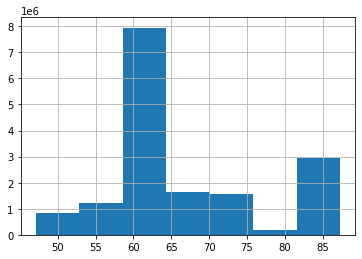

In [89]:
df.feature3.hist(bins = 7)

<AxesSubplot:>

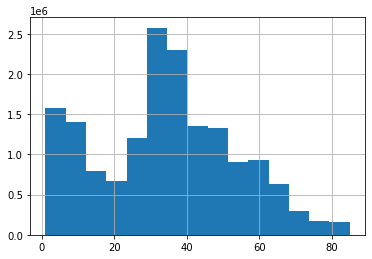

In [90]:
df.feature8.hist(bins = 15)

In [58]:
df.query('feature3 == 64.11').feature2.unique() # feature3 может характеризовать несколько сущностей

array(['id25842', 'id25843', 'id25844', 'id25845', 'id25846', 'id25847',
       'id25848', 'id25849', 'id25850', 'id25851', 'id25852', 'id25853',
       'id25854', 'id25855', 'id25856', 'id25857', 'id25858', 'id25859',
       'id25860', 'id25861', 'id25862', 'id25863', 'id25864', 'id25865',
       'id25866', 'id25867', 'id25868', 'id25869', 'id25870', 'id25871',
       'id25872', 'id25873', 'id25874', 'id28305', 'id28306', 'id28307',
       'id28308', 'id28309', 'id28310', 'id28311', 'id28312', 'id28313',
       'id28314', 'id28315', 'id28316', 'id28317', 'id28318', 'id28319',
       'id28320', 'id28321', 'id28322', 'id28323'], dtype=object)

In [60]:
df.query("feature3 == 64.11 and feature2 == 'id25842'")

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
458794,458794,2020-10-13 08:34:57,id25842,64.11,0,0,0,0,1.0,1.0,2
458795,458795,2020-10-13 08:34:57,id25842,64.11,0,0,0,0,55.0,0.0,3
458796,458796,2020-10-13 08:34:57,id25842,64.11,0,0,1,0,56.0,1.0,4
458797,458797,2020-10-13 08:34:57,id25842,64.11,1,1,0,0,51.0,1.0,8
458974,458974,2020-10-13 08:34:58,id25842,64.11,0,0,0,0,3.0,1.0,9
...,...,...,...,...,...,...,...,...,...,...,...
16310823,16310823,2021-02-24 13:02:54,id25842,64.11,0,0,0,0,59.0,0.0,5
16310824,16310824,2021-02-24 13:02:54,id25842,64.11,0,0,0,0,59.0,0.0,2
16310825,16310825,2021-02-24 13:02:54,id25842,64.11,0,0,0,0,62.0,0.0,4
16310826,16310826,2021-02-24 13:02:54,id25842,64.11,0,0,0,0,65.0,0.0,2


In [64]:
df.groupby(['feature1', 'feature2']).agg({'feature2': 'count'}).nlargest(10, 'feature2')

feature2
feature1            feature2          
2020-10-09 03:39:04 id0              3
2020-10-09 05:23:51 id422            3
2020-10-09 05:28:29 id423            3
2020-10-09 05:43:04 id639            2
2020-10-09 05:46:35 id876            1
...                                ...
2021-02-27 05:59:27 id16733         21
                    id16930         21
2021-02-27 10:17:56 id10650          1
                    id5303           1
                    id5976           1

[618265 rows x 1 columns]

In [92]:
df.groupby(['feature1', 'feature2', 'feature3']).agg({'feature2': 'count'})

feature2
feature1            feature2 feature3          
2020-10-09 03:39:04 id0      47.65            3
2020-10-09 05:23:51 id422    71.10            3
2020-10-09 05:28:29 id423    71.10            3
2020-10-09 05:43:04 id639    63.91            2
2020-10-09 05:46:35 id876    47.11            1
...                                         ...
2021-02-27 05:59:27 id16733  69.20           21
                    id16930  69.20           21
2021-02-27 10:17:56 id10650  64.19            1
                    id5303   64.19            1
                    id5976   64.19            1

[618265 rows x 1 columns]

In [94]:
df.groupby(['feature2', 'feature1', 'feature3']).agg({'feature2': 'count'})[:40]

feature2
feature2 feature1            feature3          
id0      2020-10-09 03:39:04 47.65            3
id1      2020-10-09 06:01:02 63.91            2
id10     2020-10-09 06:28:47 64.99           14
         2020-10-16 11:29:39 64.99           12
         2020-10-23 09:38:23 64.99           11
         2020-10-23 11:36:57 64.99           11
         2020-10-30 13:47:35 64.99            9
         2020-11-19 12:48:04 64.99           13
         2020-11-30 07:31:28 64.99           10
         2020-12-07 07:14:03 64.99           11
         2020-12-10 13:32:54 64.99            7
         2020-12-21 18:41:39 64.99            7
         2020-12-28 15:18:30 64.99            9
         2021-01-18 12:17:30 64.99           10
         2021-01-25 06:16:00 64.99            5
         2021-02-01 14:13:27 64.99            2
id100    2020-10-09 08:18:23 68.20            2
id1000   2020-10-09 10:37:36 55.10            1
         2020-10-19 12:47:41 55.10            1
         2020-10-26 08:38:08 55.10            1
         2020-11-02 08:21:02 55.10            1
         2020-11-23 07:28:45 55.10            1
         2020-11-30 08:10:41 55.10            1
         2020-12-07 09:07:21 55.10            1
id10000  2020-10-12 07:17:55 55.10            3
id10001  2020-10-12 07:18:02 47.70            3
id10002  2020-10-12 07:18:06 52.24            7
         2020-10-19 08:49:23 52.24            4
id10003  2020-10-12 07:18:15 68.20            2
id10004  2020-10-12 07:18:18 71.12            4
         2020-11-23 12:37:55 71.12            4
         2020-11-30 11:06:15 71.12            1
         2020-12-07 07:21:45 71.12            4
         2020-12-14 08:41:27 71.12            1
         2021-01-11 12:47:23 71.12            1
id10005  2020-10-12 07:18:21 47.19           25
         2020-10-21 13:48:23 47.19           21
         2020-10-21 13:48:24 47.19            4
         2020-10-26 06:38:35 47.19           18
         2020-10-26 06:38:36 47.19            4

In [107]:
df.query('feature3 == 85.14').feature1.unique()

array(['2020-10-09T07:17:48.000000000', '2020-10-09T07:21:31.000000000',
       '2020-10-09T07:23:27.000000000', ...,
       '2021-02-18T08:39:18.000000000', '2021-02-19T06:25:20.000000000',
       '2021-02-19T07:04:30.000000000'], dtype='datetime64[ns]')

In [108]:
len(df.query('feature3 == 85.14').feature1.unique())

32610

In [95]:
df.to_csv('test_dataIP3.csv')

In [102]:
df.query("feature1 == '2020-10-12 21:13:28'").groupby(['feature3', 'feature10']).agg({'feature3': 'count'})

feature3
feature3 feature10          
85.14    0               315
         1               150
         2               195
         3               165
         4               375
         5                30
         6                15
         7                75
         8              3600
         9               135

# feature3 (числовой признак) связан с feature1 (время) - один ко многим
# feature2 связан с feature3,	feature4,	feature5 - один к одному

In [6]:
df.drop_duplicates() # Дубликаты в данных отсутствуют

,Unnamed: 0,Unnamed: 0.1,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,0,0,2020-10-09 03:39:04,id0,47.65,0,0,0,0,19.0,0.0,0
1,1,1,2020-10-09 06:01:02,id1,63.91,0,0,0,0,52.0,0.0,1
2,2,2,2020-10-09 06:11:37,id2,64.99,1,0,0,0,32.0,0.0,2
3,3,3,2020-10-09 06:18:57,id3,85.21,0,0,0,0,3.0,1.0,3
4,4,4,2020-10-09 06:18:57,id3,85.21,0,0,0,0,7.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16321431,16321431,16321431,2021-02-27 05:59:27,id16732,69.20,0,0,1,0,9.0,0.0,2
16321432,16321432,16321432,2021-02-27 05:59:27,id16732,69.20,1,0,0,0,43.0,0.0,8
16321433,16321433,16321433,2021-02-27 05:59:27,id16733,69.20,0,0,1,0,9.0,0.0,2
16321434,16321434,16321434,2021-02-27 05:59:27,id16930,69.20,0,0,0,0,2.0,0.0,7


<AxesSubplot:>

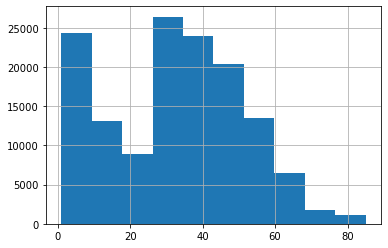

In [8]:
df.query("feature2 == 'id25842'").feature8.hist()

<AxesSubplot:>

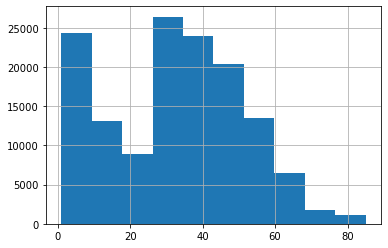

In [31]:
df.query("feature2 == 'id25843'").feature8.hist()

<AxesSubplot:>

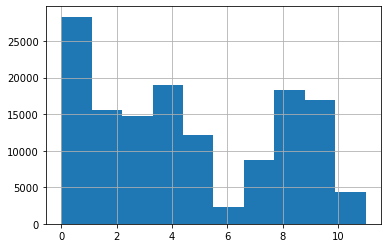

In [33]:
df.query("feature2 == 'id25843'").feature10.hist()

<AxesSubplot:>

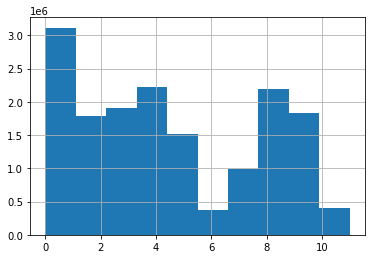

In [34]:
df.feature10.hist()

# распределение  по 8 фактору и 10 фактору по отдельным идентификаторам практически одинаково как и по датафрейму в целом - 
#feature8 - возможно, распределение возраста по целевым группам получателей услуг
#feature10 - классификатор направлений, к которому относится идентификатор

In [25]:
df.groupby([df.feature1.dt.month]).agg({'feature2': 'count'})

,feature2
feature1,
1,2615154
2,801736
10,3901750
11,2517447
12,6485349


# пик запросов декабрь 2020 года

In [30]:
df.groupby([df.feature1.dt.day_of_week]).agg({'feature2': 'count'})

,feature2
feature1,
0,6002951
1,2620099
2,2366294
3,1894528
4,2807668
5,332281
6,297615


# Большинство запросов в понедельник

In [35]:
df.head()

,Unnamed: 0,Unnamed: 0.1,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10
0,0,0,2020-10-09 03:39:04,id0,47.65,0,0,0,0,19.0,0.0,0
1,1,1,2020-10-09 06:01:02,id1,63.91,0,0,0,0,52.0,0.0,1
2,2,2,2020-10-09 06:11:37,id2,64.99,1,0,0,0,32.0,0.0,2
3,3,3,2020-10-09 06:18:57,id3,85.21,0,0,0,0,3.0,1.0,3
4,4,4,2020-10-09 06:18:57,id3,85.21,0,0,0,0,7.0,0.0,3


In [37]:
df.groupby([df.feature1.dt.date]).agg({'feature2': 'count'}).nlargest(10, 'feature2')

,feature2
feature1,
2020-11-02,646667
2020-11-30,629649
2020-10-26,623745
2020-12-14,607231
2020-12-07,481513
2020-10-13,473173
2020-12-28,447459
2020-10-19,431523
2021-01-11,414300


# большинсто запросов было 2 ноября 2020 года

In [38]:
df.groupby([df.feature1.dt.time]).agg({'feature2': 'count'}).nlargest(10, 'feature2')

,feature2
feature1,
14:13:26,15689
08:20:12,15292
13:13:53,15086
06:50:01,14363
06:16:46,14358
08:10:24,14336
08:27:37,14017
10:57:53,13572
07:59:54,13547


# Запросы в основном утреннее(6-9) и послеобеденное время (13-15)

In [6]:
df['date'] = df.feature1.dt.date

In [41]:
df.head()

,Unnamed: 0,Unnamed: 0.1,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,date
0,0,0,2020-10-09 03:39:04,id0,47.65,0,0,0,0,19.0,0.0,0,2020-10-09
1,1,1,2020-10-09 06:01:02,id1,63.91,0,0,0,0,52.0,0.0,1,2020-10-09
2,2,2,2020-10-09 06:11:37,id2,64.99,1,0,0,0,32.0,0.0,2,2020-10-09
3,3,3,2020-10-09 06:18:57,id3,85.21,0,0,0,0,3.0,1.0,3,2020-10-09
4,4,4,2020-10-09 06:18:57,id3,85.21,0,0,0,0,7.0,0.0,3,2020-10-09


# Анализ временных рядов Рассмотрим задачу прогнозирования нагрузки на ID за сутки

In [7]:
df_time = df.groupby('date').agg({'feature2': 'count'})
df_time.head()

,feature2
date,
2020-10-09,109462
2020-10-10,28000
2020-10-11,36120
2020-10-12,188296
2020-10-13,473173


In [8]:
df_time.index = pd.to_datetime(df_time.index)

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='date'>

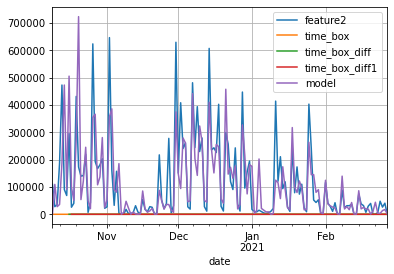

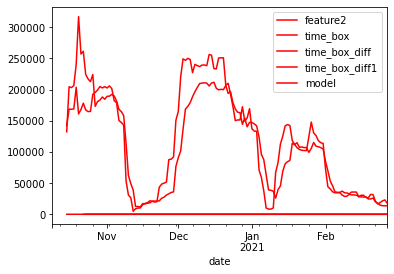

In [44]:
df_time.plot(grid = True)
df_time.rolling(window = 7).mean().plot(color = 'r')

# есть сезонность

<AxesSubplot:xlabel='date'>

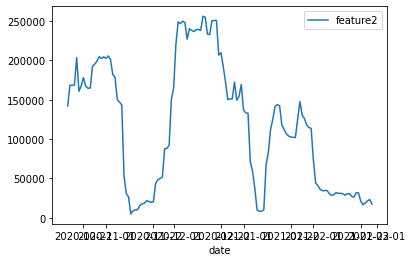

In [58]:
df_time.rolling(window = 7).mean().plot()

In [53]:
#df_time1['weekday'] = df_time1.index.day_of_week
#df_time1['is_weekend'] = df_time1.index.day_of_week.isin([5,6])*1
#df_time1['hour'] = df_time1.index.hour

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


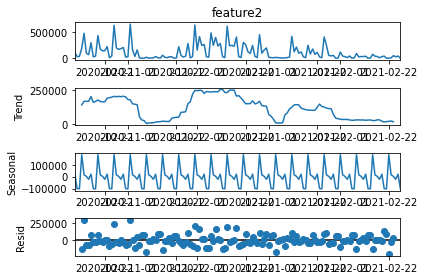

<Figure size 1440x1080 with 0 Axes>

Критерий Дики-Фуллера: p=0.143884


In [22]:
%pylab inline
sm.tsa.seasonal_decompose(df_time.feature2).plot()
plt.figure(figsize = (20,15))
pylab.show()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_time.feature2)[1])

# ряд нестационарен, нестационарна дисперсия

Оптимальный параметр преобразования Бокса-Кокса: 0.202134
Критерий Дики-Фуллера: p=0.396674


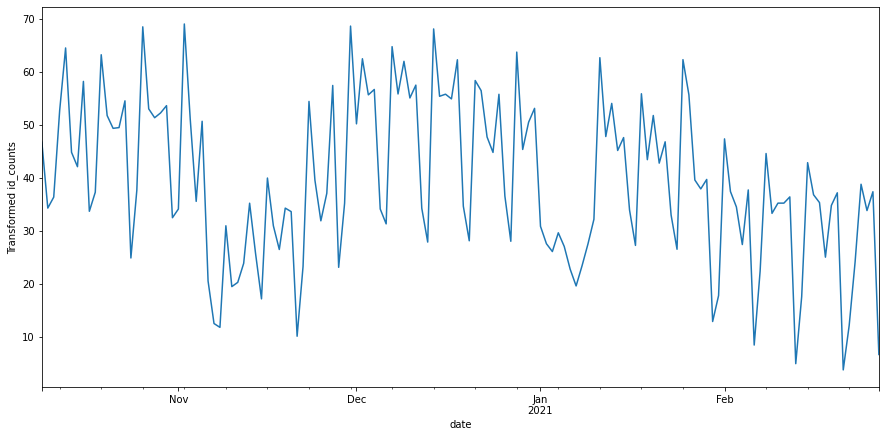

In [23]:
import scipy.stats as sst
#Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:
df_time['time_box'], lmbda = sst.boxcox(df_time.feature2)
plt.figure(figsize = (15,7))
df_time.time_box.plot()
plt.ylabel(u'Transformed id_counts')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_time.time_box)[1])

In [ ]:
#Визуально в данных виден тренд. Попробуем недельное дифференцирование; сделаем на продифференцированном ряде 
#STL-декомпозицию и проверим стационарность:

Критерий Дики-Фуллера: p=0.030889


<Figure size 1080x720 with 0 Axes>

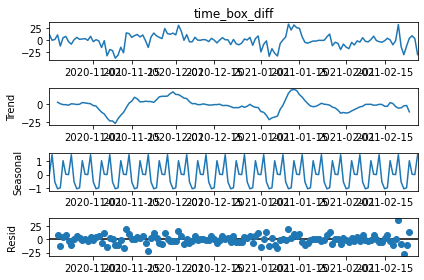

In [24]:
df_time['time_box_diff'] = df_time.time_box - df_time.time_box.shift(7, freq = 'D')
plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(df_time.time_box_diff[7:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_time.time_box_diff[7:])[1])

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

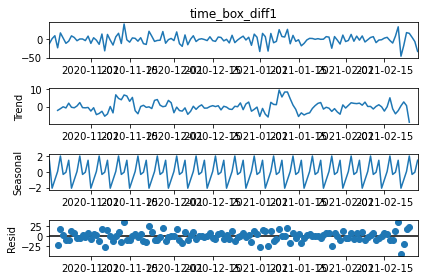

In [25]:
df_time['time_box_diff1'] = df_time.time_box_diff - df_time.time_box_diff.shift(1)
plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(df_time.time_box_diff1[8:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(df_time.time_box_diff1[8:])[1])

# #Гипотеза нестационарности отвергается, и визуально ряд выглядит лучше — тренда больше нет.

In [ ]:
#Подбор модели¶
#Посмотрим на ACF и PACF полученного ряда:

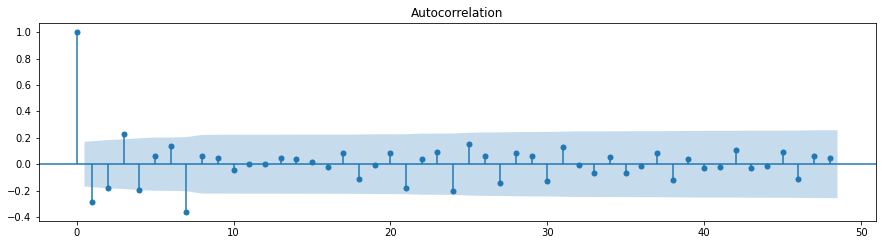

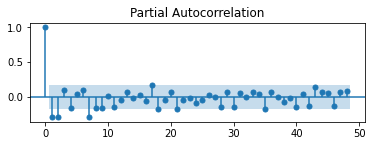

In [27]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_time.time_box_diff1[8:].values.squeeze(), lags=48, ax=ax)
plt.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_time.time_box_diff1[8:].values.squeeze(), lags=48, ax=ax)
plt.show()

In [28]:
ps = range(0, 5)
d=1
qs = range(0, 5)
Ps = range(0, 6)
D=1
Qs = range(0, 2)

In [29]:
from itertools import product
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

300

In [30]:
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(df_time.time_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 7)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

In [31]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

       parameters         aic
85   (1, 2, 0, 1)  984.988947
91   (1, 2, 3, 1)  985.399574
121  (2, 0, 0, 1)  985.531091
49   (0, 4, 0, 1)  986.356853
145  (2, 2, 0, 1)  986.563313


C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                            time_box   No. Observations:                  142
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 7)   Log Likelihood                -487.494
Date:                             Fri, 13 Aug 2021   AIC                            984.989
Time:                                     11:08:37   BIC                            999.478
Sample:                                 10-09-2020   HQIC                           990.877
                                      - 02-27-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7089      0.155     -4.560      0.000      -1.014      -0.404
ma.L1          0.2657      

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Критерий Стьюдента: p=0.787463
Критерий Дики-Фуллера: p=0.000000


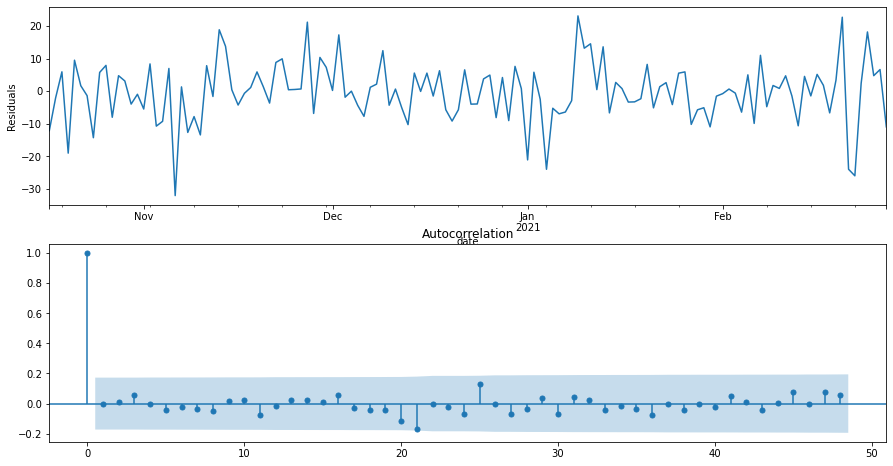

In [34]:
plt.figure(figsize = (15,8))
plt.subplot(211)
best_model.resid[8:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % sst.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [35]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


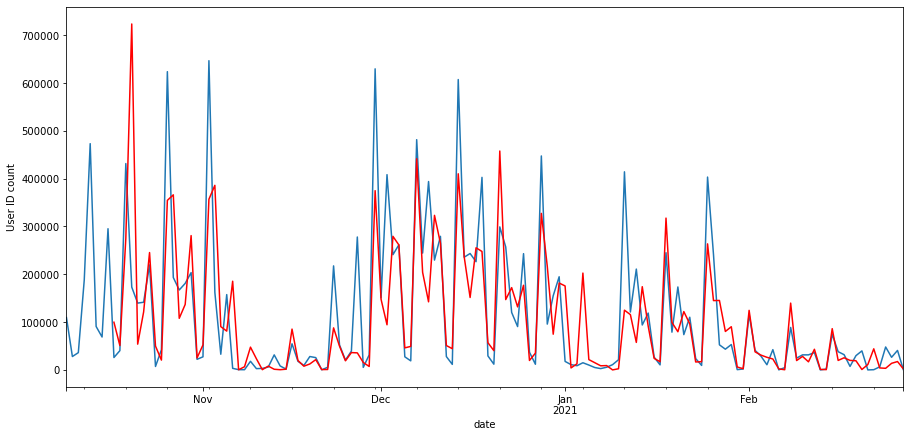

In [36]:
df_time['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize = (15,7))
df_time.feature2.plot()
df_time.model[8:].plot(color='r')
plt.ylabel('User ID count')
plt.show()

In [37]:
df_time.tail()

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,feature2,time_box,time_box_diff,time_box_diff1,model
date,,,,,
2021-02-23,6359,24.103368,-12.664997,18.069288,4137.788514
2021-02-24,47929,38.751504,3.461242,16.126240,3352.576831
2021-02-25,26387,33.785139,8.794928,5.333686,13775.497090
2021-02-26,40743,37.340001,2.583211,-6.211717,17494.369264
2021-02-27,67,6.626492,-30.511895,-33.095106,1800.114488


In [38]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2020-10-09 to 2021-02-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   feature2        142 non-null    int64  
 1   time_box        142 non-null    float64
 2   time_box_diff   135 non-null    float64
 3   time_box_diff1  134 non-null    float64
 4   model           142 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 10.7 KB


C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Прогноз на 21 день вперед

In [49]:
date_list = pd.date_range(start = "2021-02-28", periods = 30)

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


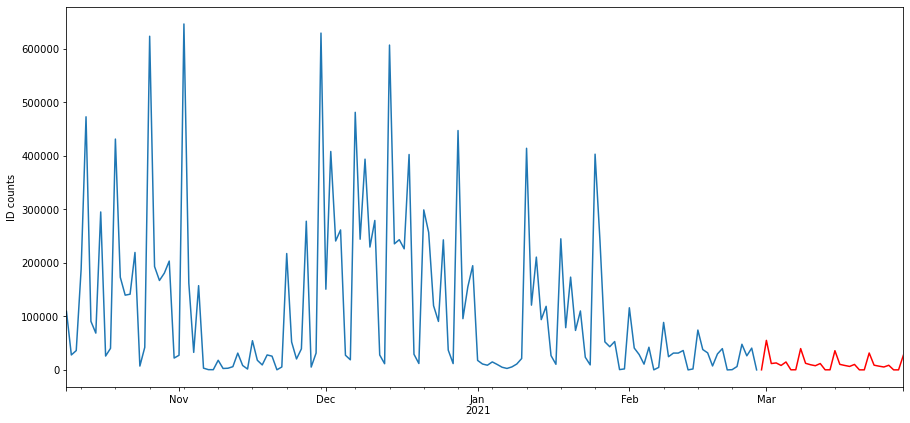

In [50]:
df_time2 = df_time[['feature2']]
future = pd.DataFrame(index=date_list, columns= df_time2.columns)
df_time2 = pd.concat([df_time2, future])
df_time2['forecast'] = invboxcox(best_model.predict(start=142, end=172), lmbda)
plt.figure(figsize = (15,7))
df_time2.feature2.plot()
df_time2.forecast.plot(color='r')
plt.ylabel('ID counts')
plt.show()

In [51]:
df_time2.tail(30)

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,feature2,forecast
2021-02-28,NaN,164.286438
2021-03-01,NaN,55225.426586
2021-03-02,NaN,11914.044544
2021-03-03,NaN,13055.592819
2021-03-04,NaN,8332.423131
2021-03-05,NaN,14845.529041
2021-03-06,NaN,222.273863
2021-03-07,NaN,276.296922
2021-03-08,NaN,39869.265706
2021-03-09,NaN,12377.391245


# Можно то же самое сделать с уникальными пользователями или с нагрузкой по часам

In [55]:
df_uniq = df.groupby([df.feature1.dt.date]).agg({'feature2': lambda x: len(x.unique())})

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
df_uniq.index = pd.to_datetime(df_uniq.index)

<AxesSubplot:xlabel='feature1'>

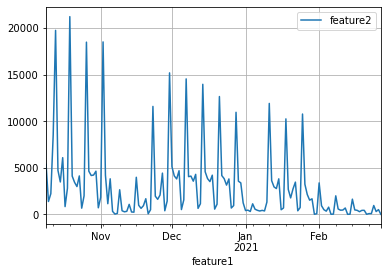

In [57]:
df_uniq.plot(grid = True)